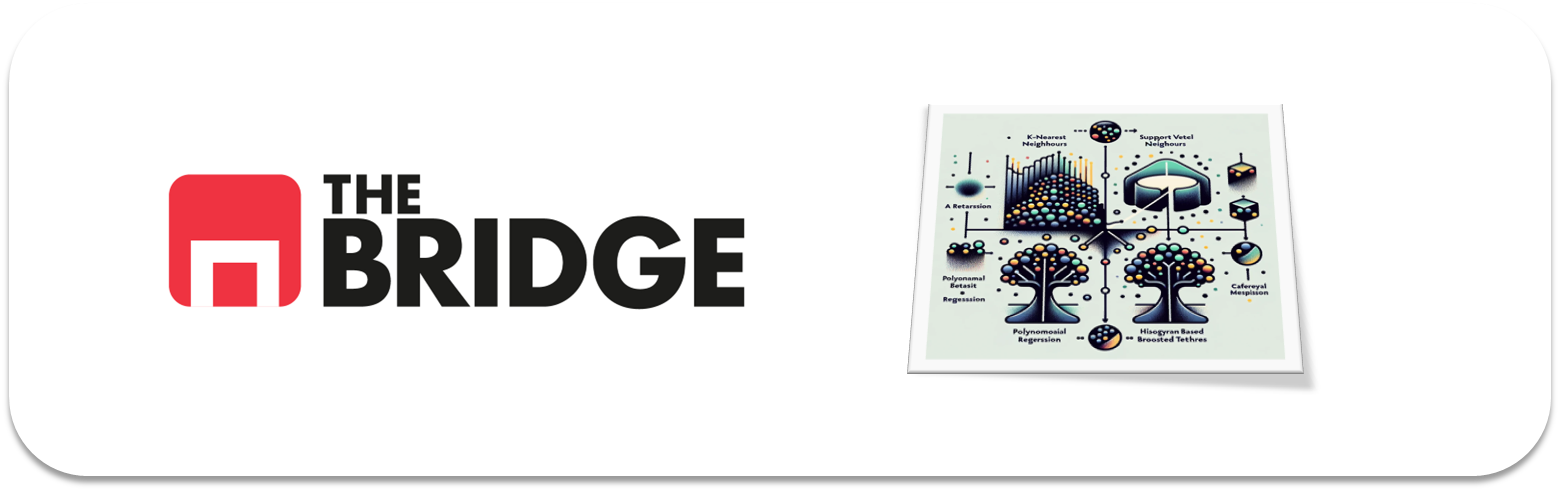

## PRACTICA OBLIGATORIA: **Repaso Aprendizaje Supervisado**

* La práctica obligatoria de esta unidad consiste en resolver sobre un mismo dataset un problema de clasificación y un problema de regresión. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split


### #1 Explicación del dataset y carga de datos

Vamos a trabajar con el dataset "Wine Quality", que es un dataset en el que se recogen diversas características fisicoquímicas de las variades tinta y blanca del "Vinho verde" portugués. Las variables del dataset se describen a continuación


1. **Acidez fija**: La mayoría de los ácidos involucrados con el vino son fijos o no volátiles (no se evaporan fácilmente).
2. **Acidez volátil**: La cantidad de ácido acético en el vino, que en niveles demasiado altos puede llevar a un sabor desagradable a vinagre.
3. **Ácido cítrico**: Encontrado en pequeñas cantidades, el ácido cítrico puede añadir 'frescura' y sabor a los vinos.
4. **Azúcar residual**: Es la cantidad de azúcar restante después de que se detiene la fermentación, es raro encontrar vinos con menos de 1 gramo/litro y vinos con más de 45 gramos/litro se consideran dulces.
5. **Cloruros**: La cantidad de sal en el vino.
6. **Dióxido de azufre libre**: La porción libre de SO2 existe en equilibrio entre el SO2 molecular (como un gas disuelto) y el ion bisulfito; previene el crecimiento microbiano y la oxidación del vino.
7. **Dióxido de azufre total**: Es la cantidad de formas libres y ligadas de S02; en bajas concentraciones, el SO2 es en su mayoría indetectable en el vino, pero en concentraciones libres de más de 50 ppm, el SO2 se hace evidente en la nariz y el sabor del vino.
8. **Densidad**: La densidad del vino es cercana a la del agua dependiendo del porcentaje de alcohol y contenido de azúcar.
9. **pH**: Describe qué tan ácido o básico es un vino en una escala de 0 (muy ácido) a 14 (muy básico); la mayoría de los vinos están entre 3-4 en la escala de pH.
10. **Sulfatos**: Un aditivo del vino que puede contribuir a los niveles de dióxido de azufre (SO2), que actúa como un antimicrobiano y antioxidante.
11. **Alcohol**: El porcentaje de contenido de alcohol del vino.
12. **Calidad**: Una variable de salida (basada en datos sensoriales, puntuación entre 0 y 10).
13. **Class**: Si es blanco o tinto.



Carga el dataset "wines_dataset.csv", muestra sus primeras filas, su información general y define dos variables target una para clasificación que permita predecir la calidad del vino según el resto de propiedas y otra variable target para regresión que permita predecir el grado alcohólico del vino a partir del resto de propiedades. 

El **objetivo de negocio en el primer problema** será anticipar la posible clasificación de sus vinos por los catadores profesionales y a partir de ahí poder planificar la producción, distribución y precio a poner a cada vino. En este sentido, el "cliente" nos dice que le gustaría poder clasificar correctamente lo mejor posible en media  (que interpretamos como el mejor recall medio posible).

El **objetivo de negocio en el segundo problema** (bastante artificial) es poder hacer simulaciones de posibles vinos futuros para saber cómo conseguir variedades más o menos alcohólicas para atender mercados diferentes. En este sentido, les interesa equivocarse lo menos posible porcentualmente sobre el grado alochólico real.

Muestra la distribución de ambos targets y haz un pequeño assesment previo de cada problema. NOTA: El dataset está limpio y sin valores faltantes.

In [100]:
df = pd.read_csv('/Users/lauragarcia/Projects/DS_Online_Febr25_Exercises/04_Machine_Learning/Sprint_12/Unidad_02/Practica_Obligatoria/data/wines_dataset.csv', sep= '|')


In [101]:
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,class
1974,10.8,0.40,0.41,2.20,0.084,7.0,17.0,0.998400,3.08,0.67,9.3,6,red
5960,6.0,0.25,0.28,2.20,0.026,54.0,126.0,0.989800,3.43,0.65,12.9,8,white
2652,7.4,0.45,0.32,7.10,0.044,17.0,117.0,0.996200,3.32,0.41,10.4,4,white
1156,6.7,0.46,0.27,5.20,0.039,35.0,96.0,0.991290,3.16,0.44,12.4,7,white
4599,6.0,0.20,0.25,2.00,0.041,30.0,95.0,0.990780,3.27,0.56,11.1,6,white
1447,7.3,0.40,0.26,5.45,0.016,26.0,90.0,0.989510,2.84,0.54,13.2,7,white
2004,6.2,0.20,0.25,15.00,0.055,8.0,120.0,0.997670,3.19,0.53,9.6,6,white
1823,8.3,0.30,0.49,3.80,0.090,11.0,24.0,0.994980,3.27,0.64,12.1,7,red
1671,7.8,0.29,0.36,7.00,0.042,38.0,161.0,0.994100,3.26,0.37,11.2,8,white
6062,6.4,0.16,0.42,1.00,0.036,29.0,113.0,0.990800,3.18,0.52,11.0,6,white


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  class                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [103]:
# Definimos las target
target_clf = 'quality'
target_reg = 'alcohol'

In [104]:
# Primer modelo de clasificación es obtener el mejor recall medio
# Segundo modelo equivocarse lo menos posible en el grado alcoholico

<Axes: xlabel='quality', ylabel='count'>

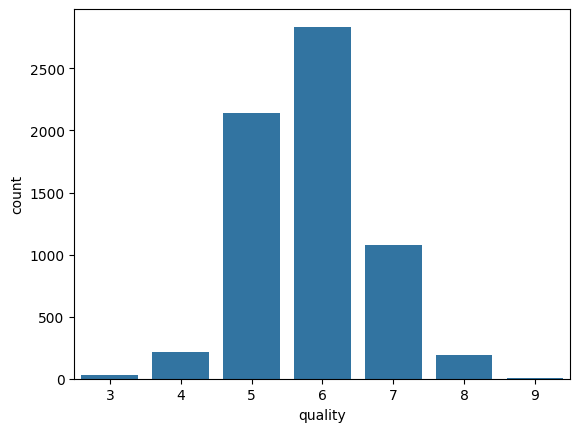

In [105]:
# Voy a mirar la distribución de la target para la clasificación
sns.countplot( x= 'quality', data= df)

In [106]:
# Se puede decir que tiene una distribución normal

<Axes: xlabel='alcohol', ylabel='count'>

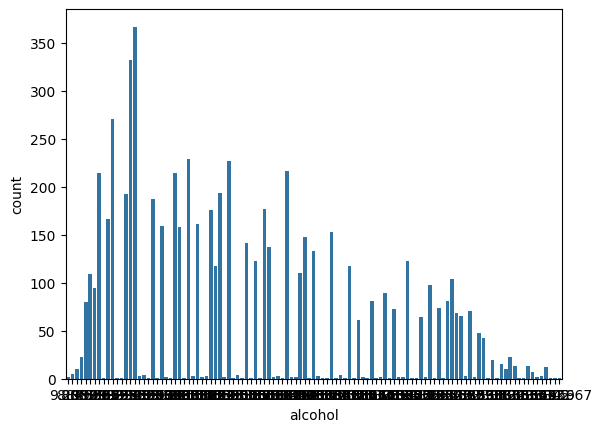

In [107]:
# Target problema de regresion
sns.countplot( x= 'alcohol', data= df)

In [108]:
# Aquí su distribución no es tan normal, pero todo es mejorable

### #2 Modelado para clasificación

Crea un modelo que permita clasificar lo mejor posible los vinos en función de su calidad, o dicho de otro modo que prediga de la mejor manera posible la calidad de un vino a partir de sus propiedades químicas. ***Considéralo un problema de clasificación***, donde los valores de calidad son las clases a predecir. Puedes utilizar los modelos que creas conveniente, al menos tres, y utiliza un KNN como modelo baseline, prueba al menos con 2 valores de K. Intenta mejorar el "recall medio" con las técnicas que creas conveniente. Compara los modelos utilizando validación cruzada con o sin optimización previa de hiperparámetros (aunque en la sesión en vivo por limitación de tiempos sólo lo haremos con validación cruzada). El modelo elegido si tiene que tener un ejemplo de optimización de parámetros.

Evalúa el modelo, analiza los errores y propón algún mecanismo de mejora aunque sea sólo un esbozo.

In [109]:
# Como ya tenemos las variables target escogidas, vamos a hacer el split y ver cómo se comportan el resto de variables con la target en el problema de clasificación
train_set_clf, test_set_clf = train_test_split(df, train_size= 0.2, random_state= 42)

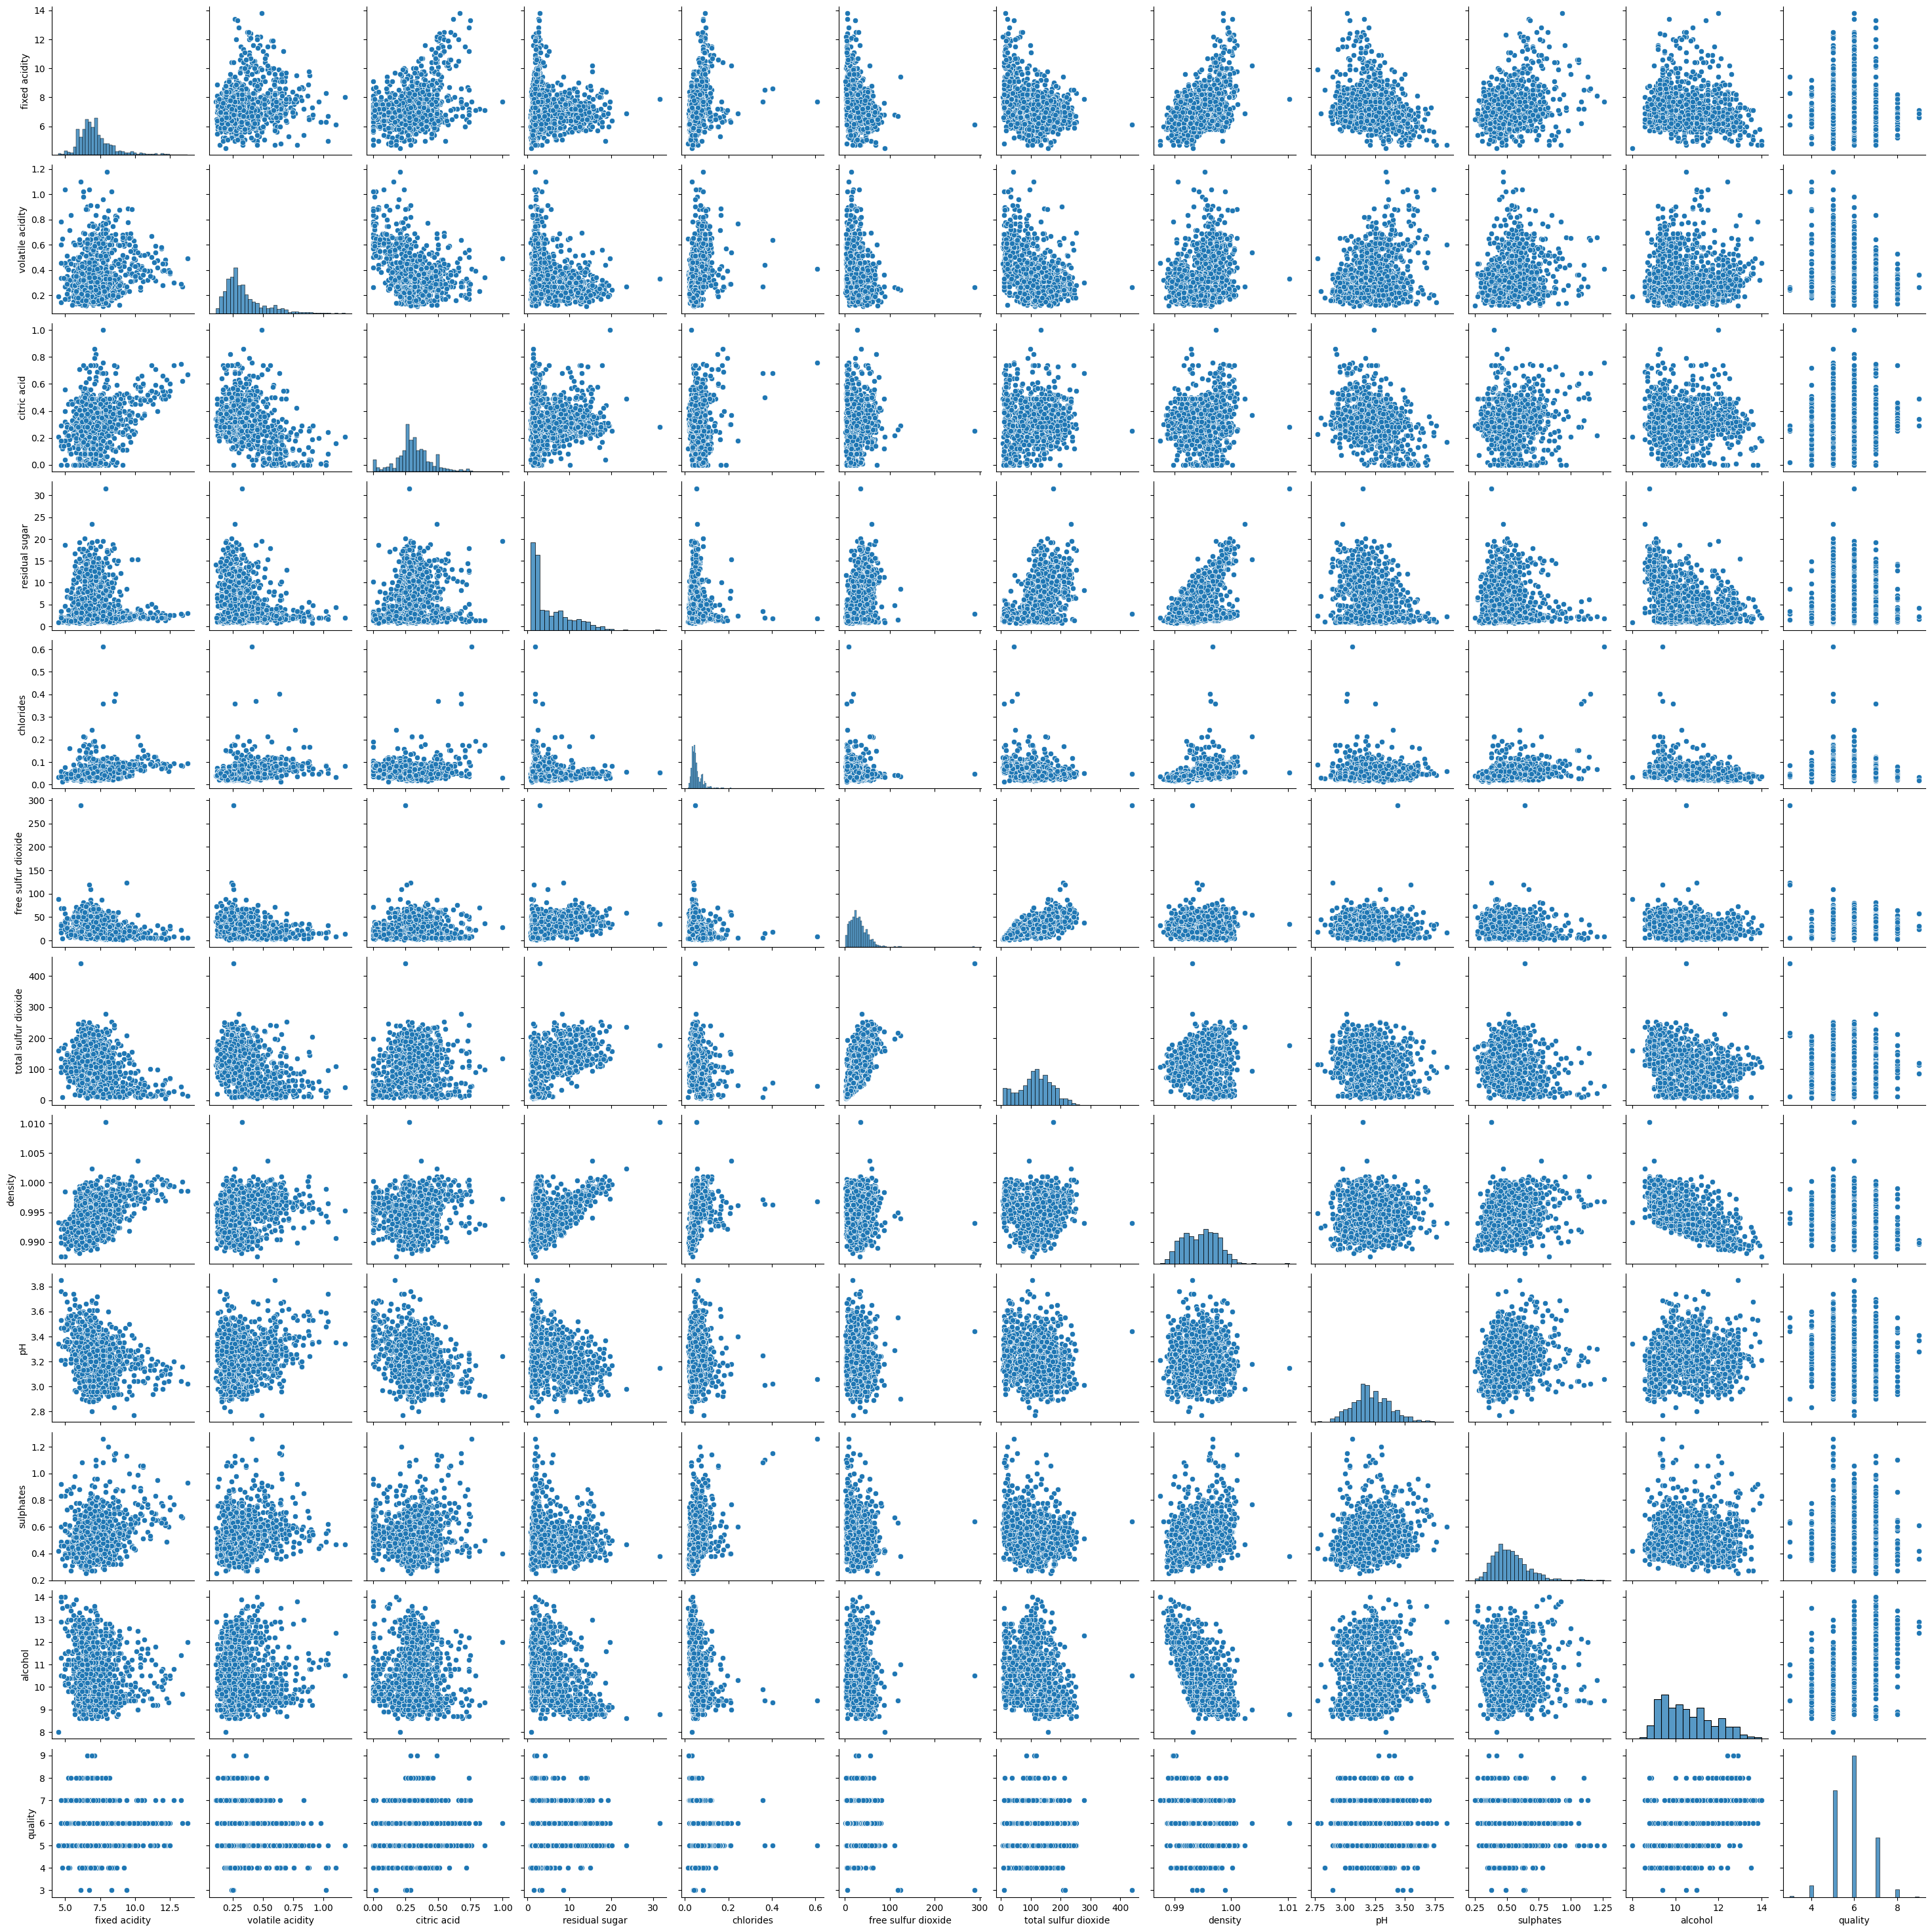

In [110]:
sns.pairplot(train_set_clf);

In [111]:
# Aparentemente todas las variables tienen cierta relación con nuestra variable target, por lo que nos quedaremos con todas
# Clasiicamos las variables
# Creamos una dataframe para tipificar cada columna y ver qué variables son categóricas, binarias, numéricas contínuas o discretas
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",1: "%_Card", 2: "Tipo"})
# Ahora ya si las clasificamos en función de los resultados de las operaciones realizadas en el apartado anterior
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 10, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
print(df_tipificacion) 

                     Card     %_Card     Tipo   Clasificada_como
fixed acidity         106   1.631522  float64  Numerica Discreta
volatile acidity      187   2.878252  float64  Numerica Discreta
citric acid            89   1.369863  float64  Numerica Discreta
residual sugar        316   4.863783  float64  Numerica Discreta
chlorides             214   3.293828  float64  Numerica Discreta
free sulfur dioxide   135   2.077882  float64  Numerica Discreta
total sulfur dioxide  276   4.248115  float64  Numerica Discreta
density               998  15.360936  float64  Numerica Discreta
pH                    108   1.662306  float64  Numerica Discreta
sulphates             111   1.708481  float64  Numerica Discreta
alcohol               111   1.708481  float64  Numerica Discreta
quality                 7   0.107742    int64         Categorica
class                   2   0.030783   object            Binaria


In [112]:
# Vemos que la mayoria de las variables son numéricas a excepción de la calidad (que es nuestra target) y la clase que es binaria
features_num = train_set_clf.columns.tolist()
features_num.remove('quality')
features_num.remove('class')
features_cat = train_set_clf['class']

In [113]:
features_num

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

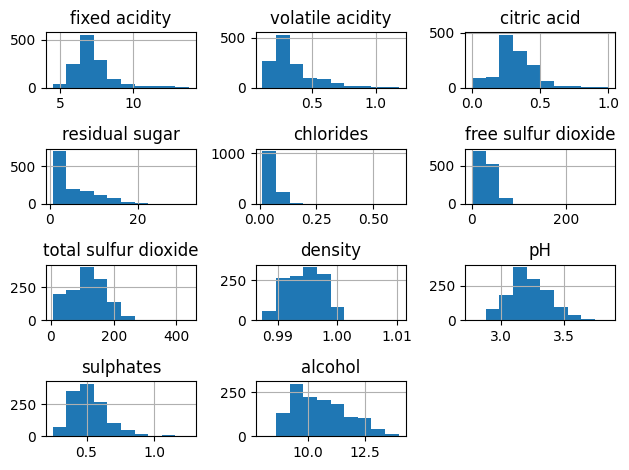

In [114]:
# Voy a empezar a ver la distribución de las features num
train_set_clf[features_num].hist()
plt.tight_layout();

In [115]:
# Parece que tienen una distribución más o menos normal pH, total sulfur dioxide.
# El resto tienen una distribución parecida a la normal pero con colas largas
# Ya que nos piden 3 modelos, uno de ellos KNN, tenemos que tratar las variables y escalarlas
# por lo tanto le voy a aplicar el logaritmo a las features num, menos a las nombradas anteriormente
for col in features_num:
    if col != 'pH' and col != 'total sulfur dioxide':
        train_set_clf[col]= np.log(train_set_clf[col] + 1) # aplicamos a train
        test_set_clf[col] = np.log(test_set_clf[col]+1)# aplicamos a test

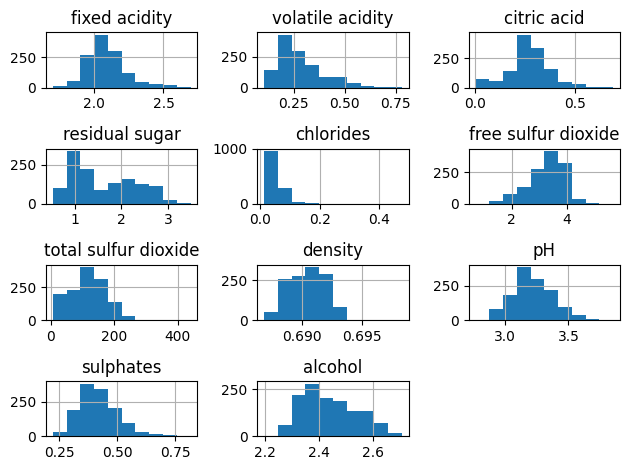

In [116]:
# Compruebo si ha habido alguna modificacion en sus distribuciones
train_set_clf[features_num].hist()
plt.tight_layout();

In [117]:
# Salvo a chlorides, parece que el resto ha mejorado ligeramente
# Vamos a scalar las variables numéricas para poder seguir
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

train_set_clf[features_num]= scaler.fit_transform(train_set_clf[features_num]) # aplicamos a train
test_set_clf[features_num] = scaler.transform(test_set_clf[features_num]) # aplicamos a test

In [118]:
# Ahora que tenemos tratadas las numéricas, veamos si podemos hacer algo con la categórica(binaria)
# Vamos a aplicar un get_dummies para que sean 0 o 1 
train_set_clf_modif = pd.get_dummies(train_set_clf, columns=['class'], dtype= int) # Creo un nuevo set en el que he añadido las dos nuevas clases de class
test_set_clf_modif = pd.get_dummies(test_set_clf, columns=['class'], dtype= int)


In [119]:
# Ahora remodelamos las features, ya que las categoricas se han transformado en 2 columnas
features = train_set_clf_modif.columns.to_list()
features.remove('quality')
features


['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'class_red',
 'class_white']

In [120]:
# una vez que tenemos tratados los datos, procedemos al modelado,
# Construimos los X, y
X_train = train_set_clf_modif[features]
y_train = train_set_clf_modif[target_clf]
X_test = test_set_clf_modif[features]
y_test = test_set_clf_modif[target_clf]

In [121]:
# Hacemos nuestro baseline con KNN
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier()

In [122]:
# Miramos sus métricas
from sklearn.metrics import classification_report
print(classification_report(y_train, knn_clf.predict(X_train)))

              precision    recall  f1-score   support

           3       1.00      0.25      0.40         4
           4       0.63      0.36      0.46        47
           5       0.70      0.74      0.72       422
           6       0.66      0.73      0.70       558
           7       0.66      0.56      0.61       235
           8       0.62      0.17      0.26        30
           9       0.00      0.00      0.00         3

    accuracy                           0.67      1299
   macro avg       0.61      0.40      0.45      1299
weighted avg       0.67      0.67      0.67      1299



/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [123]:
# Voy a volver a entrenarlo con otra número de K = 3
knn_clf_tres = KNeighborsClassifier(n_neighbors=3)
knn_clf_tres.fit(X_train,y_train)
print(classification_report(y_train, knn_clf_tres.predict(X_train)))

              precision    recall  f1-score   support

           3       1.00      0.25      0.40         4
           4       0.44      0.62      0.51        47
           5       0.75      0.79      0.77       422
           6       0.77      0.78      0.77       558
           7       0.76      0.70      0.73       235
           8       0.73      0.27      0.39        30
           9       0.00      0.00      0.00         3

    accuracy                           0.75      1299
   macro avg       0.64      0.49      0.51      1299
weighted avg       0.75      0.75      0.74      1299



/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divisi

In [124]:
# Escojo para hacer el cross_validatiion el segundo modelo que parece que son mejores
from sklearn.model_selection import cross_val_score
metrica_KNN = np.mean(cross_val_score(knn_clf_tres,X_train,y_train, cv=5, scoring='balanced_accuracy' ))
metrica_KNN

/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


np.float64(0.32565736124492606)

In [125]:
# Voy a aplicar otros dos modelos a ver que tal me dan los resultados
# Regresor logístico
from sklearn.linear_model import LogisticRegression

reg_log = LogisticRegression(max_iter=10000) 
metrica_reg = np.mean(cross_val_score(reg_log,X_train,y_train, cv=5, scoring='balanced_accuracy' ))
metrica_reg

/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


np.float64(0.27554534749175363)

In [126]:
# Tercer modelo
from sklearn.ensemble import RandomForestClassifier
tree_clf =RandomForestClassifier(n_estimators=500, max_depth=7, random_state=42) # pongo 7 ramas ya que son las diferentes clasificaciones de calidad
metrica_tree = np.mean(cross_val_score(tree_clf,X_train,y_train, cv=5, scoring='balanced_accuracy' ))
metrica_tree

/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


np.float64(0.2615229114455827)

In [127]:
# Pongo las tres métricas para ver cual es la mejor
print(f"KNN: {metrica_KNN}")
print(f"Regresión logistica: {metrica_reg}")
print(f"Árbol: {metrica_tree}")

KNN: 0.32565736124492606
Regresión logistica: 0.27554534749175363
Árbol: 0.2615229114455827


In [128]:
# Aparentemente el mejor es KNN

In [131]:
# Optimizamos 
from sklearn.model_selection import GridSearchCV
params_grid = {
    "n_neighbors": [3,5,7]}
   

knn_clf_tres_grid = GridSearchCV(knn_clf_tres,
                       param_grid= params_grid,
                       cv = 5,
                       scoring = "accuracy",
                       n_jobs = -1)

knn_clf_tres_grid.fit(X_train, y_train)

/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7]}, scoring='accuracy')

In [132]:
metrica_optimizada= np.mean(cross_val_score(knn_clf_tres_grid,X_train,y_train, cv=5, scoring='balanced_accuracy' ))
metrica_optimizada

/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/lauragarcia/.local/share/virtualenvs/lauragarcia-3NpKiQeF/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2524: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/Users/lauragarcia/.lo

np.float64(0.26310871243264417)

In [133]:
# Aparentemente no ha mejorado las métricas, por lo que me quedaría con mi modelo inicial, el KNN con su k=3

### #3 Modelado para regresión

Reutiliza todo lo que puedas la preparación del modelado de la parte anterior y construye ahora el mejor modelo que puedas para predecir el grado alcohólico de un vino dadas sus características fisico químicas, su clase y la puntuación de calidad que le ha sido otorgada. Compara al menos tres tipos de modelos, seleccionando una métrica adecuada de comparación y escoge el más apropiado empleando validación cruzada antes o después de optimizar hiperparámetros (en la sesión en vivo lo haremos antes por cuestiones de tiempo). Evalúa el modelo escogido y con los hiperparámetros ajustados de la mejor manera que puedas. Para terminar realizar un pequeño análisis de errores.

In [ ]:
# Pasamos al modelado de regresión